In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
from scipy import stats
from scipy.stats import norm
import plotly.express as px
import category_encoders as ce
from sklearn import preprocessing,metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,explained_variance_score,mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_audi = pd.read_csv("audi.csv")
df_bmw = pd.read_csv("bmw.csv")
df_merc = pd.read_csv("merc.csv")
df_ford = pd.read_csv("ford.csv")
df_hyundai = pd.read_csv("hyundai.csv")
df_skoda = pd.read_csv("skoda.csv")
df_toyota = pd.read_csv("toyota.csv")
df_vauxhall = pd.read_csv("vauxhall.csv")
df_vw = pd.read_csv("vw.csv")
df_fuel_price_and_conversions= pd.read_excel('Fuel_Prices_and_Conversions.xlsx')
dataframe_carmantain = pd.read_csv("Car_Maintenance_Costs.csv")


In [3]:
print("Columns in the Audi dataframe:") 
print(list(df_audi.columns))
print("-" * 50)
print("Columns in the BMW dataframe:")
print(list(df_bmw.columns))
print("-" * 50)
print("Columns in the Ford dataframe:")
print(list(df_ford.columns))
print("-" * 50)
print("Columns in the Hyundai dataframe:")
print(list(df_hyundai.columns))
print("-" * 50)
print("Columns in the merce dataframe:") 
print(list(df_merc.columns))
print("-" * 50)

print("Columns in the Skoda dataframe:")
print(list(df_skoda.columns))
print("-" * 50)
print("Columns in the Toyota dataframe:")
print(list(df_toyota.columns))
print("-" * 50)
print("Columns in the Vauxhall dataframe:")
print(list(df_vauxhall.columns))
print("-" * 50)
print("Columns in the VW dataframe:")
print(list(df_vw.columns))
print("-" * 50)
print("Columns in the vauxhall dataframe:")
print(list(df_vauxhall.columns))
print("-" * 50)
print("column in the car maintainace data:")
print(list(dataframe_carmantain.columns))


Columns in the Audi dataframe:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
--------------------------------------------------
Columns in the BMW dataframe:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
--------------------------------------------------
Columns in the Ford dataframe:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
--------------------------------------------------
Columns in the Hyundai dataframe:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax(£)', 'mpg', 'engineSize']
--------------------------------------------------
Columns in the merce dataframe:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
--------------------------------------------------
Columns in the Skoda dataframe:
['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'e

In hundai there is tax(pound)  first i need to fix it by rename it 

In [4]:
df_hyundai.rename({'tax(£)': 'tax'},axis=1,inplace=True)
df_hyundai.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [5]:
df_list = [df_audi,df_bmw,df_merc,df_ford,df_hyundai,df_skoda,df_toyota,df_vauxhall,df_vw]

After seeing the data we found the attributes and data is in unstructure manner like some are small alphabets some are capitals 

In [6]:
# Convert all column names to lowercase
dataframe_carmantain.columns = dataframe_carmantain.columns.str.lower()
dataframe_carmantain = dataframe_carmantain.applymap(lambda x: x.lower() if isinstance(x, str) else x)
dataframe_carmantain


,make,model,year,maintenancecostyearly
0,bmw,x3,2017,607.20
1,skoda,karoq,2018,359.07
2,toyota,hilux,2015,655.78
3,audi,rs4,2015,859.98
4,bmw,5 series,2004,1264.16
...,...,...,...,...
1605,volkswagen,caddy maxi life,2017,536.94
1606,audi,a8,2006,1246.38
1607,ford,grand c-max,2019,360.70
1608,hyundi,i10,2020,536.54


In [7]:
for i in range(len(df_list)):
    # Convert all column names to lowercase
    df_list[i].columns = [col.lower() for col in df_list[i].columns]
    # Convert all string values in the DataFrame to lowercase
    for col in df_list[i].select_dtypes(include=['object']).columns:
        df_list[i][col] = df_list[i][col].str.lower()

In [8]:
df_list[0]

,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize
0,a1,2017,12500,manual,15735,petrol,150,55.4,1.4
1,a6,2016,16500,automatic,36203,diesel,20,64.2,2.0
2,a1,2016,11000,manual,29946,petrol,30,55.4,1.4
3,a4,2017,16800,automatic,25952,diesel,145,67.3,2.0
4,a3,2019,17300,manual,1998,petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,a3,2020,16999,manual,4018,petrol,145,49.6,1.0
10664,a3,2020,16999,manual,1978,petrol,150,49.6,1.0
10665,a3,2020,17199,manual,609,petrol,150,49.6,1.0
10666,q3,2017,19499,automatic,8646,petrol,150,47.9,1.4


Now its time to merge data the data to make data together

In [9]:
import pandas as pd

merged_df_list = []
for df in df_list:
    merged_df = pd.merge(df, dataframe_carmantain, on=['model', 'year'], how='inner')
    merged_df_list.append(merged_df)


In [10]:
merged_df_list[1].columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fueltype', 'tax',
       'mpg', 'enginesize', 'make', 'maintenancecostyearly'],
      dtype='object')

I just make all column inright place to makes things easy to get it

In [11]:
# Get the list of columns in the desired order
desired_columns = ['make', 'model', 'year', 'price', 'transmission', 'mileage', 'fueltype', 'tax', 'mpg', 'enginesize', 'maintenancecostyearly']

# Iterate over each DataFrame in df_list and reorder the columns
for i in range(len(merged_df_list)):
    merged_df_list[i] = merged_df_list[i].reindex(columns=desired_columns)

In [12]:
merged_df = pd.concat(merged_df_list)
merged_df

,make,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize,maintenancecostyearly
0,audi,a1,2017,12500,manual,15735,petrol,150,55.4,1.4,787.98
1,audi,a1,2017,10800,manual,31447,petrol,145,67.3,1.0,787.98
2,audi,a1,2017,11700,manual,19268,petrol,150,67.3,1.0,787.98
3,audi,a1,2017,11300,manual,29327,petrol,30,55.4,1.4,787.98
4,audi,a1,2017,14000,manual,12577,petrol,30,58.9,1.4,787.98
...,...,...,...,...,...,...,...,...,...,...,...
12286,volkswagen,eos,2008,3695,automatic,127000,petrol,280,34.5,2.0,628.12
12287,volkswagen,eos,2015,12495,manual,41850,diesel,125,58.9,2.0,530.43
12288,volkswagen,fox,2008,1799,manual,88102,petrol,145,46.3,1.2,907.67
12289,volkswagen,fox,2006,1250,manual,82704,petrol,150,46.3,1.2,850.29


I need to store make and model name name in other data frame 

In [15]:
merged_df.isnull().sum()

make                     0
model                    0
year                     0
price                    0
transmission             0
mileage                  0
fueltype                 0
tax                      0
mpg                      0
enginesize               0
maintenancecostyearly    0
dtype: int64

In [16]:
median_tax = merged_df['tax'].median()
merged_df['tax'].fillna(median_tax, inplace=True)
merged_df.isnull().sum()

make                     0
model                    0
year                     0
price                    0
transmission             0
mileage                  0
fueltype                 0
tax                      0
mpg                      0
enginesize               0
maintenancecostyearly    0
dtype: int64

In [17]:
merged_df.describe()

,year,price,mileage,tax,mpg,enginesize,maintenancecostyearly
count,71966.000000,71966.000000,71966.000000,71966.000000,71966.000000,71966.000000,71966.000000
mean,2017.042284,17338.782369,23638.954534,120.620015,55.287357,1.704098,568.423637
std,2.121005,9934.422762,21254.976221,63.530499,16.629321,0.567714,143.948042
min,1970.000000,495.000000,1.000000,0.000000,1.100000,0.000000,312.090000
25%,2016.000000,10500.000000,7818.500000,125.000000,47.100000,1.400000,460.020000
50%,2017.000000,14999.000000,18266.000000,145.000000,54.300000,1.600000,543.930000
75%,2019.000000,21450.000000,33079.750000,145.000000,62.800000,2.000000,659.480000
max,2060.000000,159999.000000,279000.000000,580.000000,470.800000,6.600000,3319.800000


In [18]:
merged_df.head(-6)

,make,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize,maintenancecostyearly
0,audi,a1,2017,12500,manual,15735,petrol,150,55.4,1.4,787.98
1,audi,a1,2017,10800,manual,31447,petrol,145,67.3,1.0,787.98
2,audi,a1,2017,11700,manual,19268,petrol,150,67.3,1.0,787.98
3,audi,a1,2017,11300,manual,29327,petrol,30,55.4,1.4,787.98
4,audi,a1,2017,14000,manual,12577,petrol,30,58.9,1.4,787.98
...,...,...,...,...,...,...,...,...,...,...,...
12280,volkswagen,caddy,2017,15995,automatic,25797,diesel,145,55.4,2.0,419.61
12281,volkswagen,caddy maxi,2015,9995,semi-auto,66000,diesel,200,48.7,1.6,410.21
12282,volkswagen,caddy maxi,2015,9949,automatic,93113,diesel,160,52.3,1.6,410.21
12283,volkswagen,caddy maxi,2012,9995,semi-auto,53000,diesel,200,48.7,1.6,558.09


In [19]:
print(merged_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 71966 entries, 0 to 12290
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make                   71966 non-null  object 
 1   model                  71966 non-null  object 
 2   year                   71966 non-null  int64  
 3   price                  71966 non-null  int64  
 4   transmission           71966 non-null  object 
 5   mileage                71966 non-null  int64  
 6   fueltype               71966 non-null  object 
 7   tax                    71966 non-null  int64  
 8   mpg                    71966 non-null  float64
 9   enginesize             71966 non-null  float64
 10  maintenancecostyearly  71966 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 6.6+ MB
None


To compute the anticipated total cost of purchasing and operating a car over a five-year period, considering an annual mileage of 8,000 miles, and using the provided data, we can follow these steps:

1. **Data Preprocessing**:
   - Handle any missing values or data quality issues in the dataset.
   - Convert categorical variables (e.g., make, model, transmission, fueltype) to numerical format using techniques like one-hot encoding or label encoding.

2. **Feature Engineering**:
   - Calculate the fuel cost per mile for each car model based on the provided fuel prices (£1.4251 for petrol and £1.5090 for diesel), fuel type, and miles per gallon (mpg).
   - For example, if a car has an mpg of 30 and uses petrol, the fuel cost per mile would be: (1 gallon / 30 miles) * (5.546 litres / 1 gallon) * (£1.4251 / litre) = £0.2566 per mile.

3. **Total Cost of Ownership Calculation**:
   - For each car model, calculate the total cost of ownership over five years as follows:
     - Purchase cost = price
     - Fuel cost = fuel cost per mile * 8,000 miles * 5 years
     - Maintenance cost = maintenancecostyearly * 5 years
     - Total cost of ownership = purchase cost + fuel cost + maintenance cost

4. **Ranking and Recommendation**:
   - Sort the car models in ascending order based on their total cost of ownership over five years.
   - Identify and recommend the car models with the lowest total cost of ownership as the most cost-effective options.

5. **Presentation**:
   - Create a table or a chart displaying the car model, purchase price, annual fuel cost, annual maintenance cost, and total cost of ownership over five years for each model.
   - Highlight the recommended car models based on their total cost of ownership.

Here's an example output that you could present:

| Car Model | Purchase Price | Annual Fuel Cost | Annual Maintenance Cost | Total Cost of Ownership (5 Years) |
|-----------|-----------------|-------------------|-------------------------|------------------------------------|
| Model A   | £15,000         | £1,200            | £500                    | £22,500                            |
| Model B   | £18,000         | £1,000            | £600                    | £25,000                            |
| Model C   | £20,000         | £800              | £700                    | £27,000                            |
| ...       | ...             | ...               | ...                     | ...                                |

Based on the total cost of ownership over five years, the recommended car models for the least expensive options are:

1. Model A (£22,500)
2. Model B (£25,000)
3. Model C (£27,000)

This analysis considers the purchase price, fuel costs based on the provided fuel prices and annual mileage, and maintenance costs over a five-year period. By presenting the total cost of ownership for each car model, users can make informed decisions and choose the most cost-effective optionur dataset and the calculations performed. thirty allon)

In [20]:
numeric_cols = ['year', 'price', 'mileage', 'tax', 'mpg', 'enginesize', 'maintenancecostyearly']
merged_df.groupby("transmission")[numeric_cols].mean()

,year,price,mileage,tax,mpg,enginesize,maintenancecostyearly
transmission,,,,,,,
automatic,2017.050720,21802.010015,24118.468372,131.923499,55.640286,2.006829,607.795116
manual,2016.715098,12328.833016,26152.330880,108.945994,56.893791,1.442070,532.135446
other,2017.333333,16219.111111,16974.666667,111.111111,55.677778,1.355556,602.505556
semi-auto,2017.756671,24472.278131,17675.156296,136.451970,51.432383,2.016447,613.882802


In [21]:
cols_to_mean = ['year', 'price', 'mileage', 'tax', 'mpg', 'enginesize','maintenancecostyearly']
merged_df.groupby("make")[cols_to_mean].mean()

,year,price,mileage,tax,mpg,enginesize,maintenancecostyearly
make,,,,,,,
audi,2017.147820,22843.310646,24438.746189,126.659577,50.887758,1.936618,647.834914
bmw,2017.340290,23346.223441,23059.026058,135.727509,55.915340,2.157387,703.960120
ford,2016.932738,12766.349777,23306.464024,118.117576,57.471385,1.398411,495.434680
hyundi,2017.044622,13259.419917,23242.102541,124.544917,55.128369,1.522665,516.910352
mercedes,2017.232071,25072.779009,22667.876410,126.927881,54.829230,2.118261,695.255535
skoda,2017.679112,14209.505867,18134.733092,125.529123,56.651867,1.393877,470.077032
toyota,2016.388369,13539.424911,26138.456551,81.599822,63.904991,1.606952,542.591199
vauxhall,2016.378398,9843.860111,28174.226270,131.989469,51.433286,1.460566,492.136054
volkswagen,2017.103328,16061.962656,23332.977870,108.428118,54.485062,1.568351,500.995905


In [22]:
cols_to_mean1 = ['year', 'price', 'mileage', 'tax', 'mpg', 'enginesize','maintenancecostyearly']
merged_df.groupby("fueltype")[cols_to_mean1].mean()

,year,price,mileage,tax,mpg,enginesize,maintenancecostyearly
fueltype,,,,,,,
diesel,2016.887253,19514.107267,28849.462901,115.673484,57.930472,2.014926,599.039752
electric,2016.000000,16494.400000,19739.800000,27.000000,262.320000,1.080000,630.904000
hybrid,2017.135448,19047.725000,23295.863433,71.701493,87.629776,1.771157,551.224843
other,2017.397351,18939.099338,23447.701987,100.927152,93.598675,1.619205,530.931523
petrol,2017.163324,15401.932116,19331.045680,128.298932,50.611735,1.441244,544.323387


In [23]:
merged_df['price'].describe()

count     71966.000000
mean      17338.782369
std        9934.422762
min         495.000000
25%       10500.000000
50%       14999.000000
75%       21450.000000
max      159999.000000
Name: price, dtype: float64

Ahh see the data quantity now one thing is true feeding havey data is stressfull fo machine learning model we can loose some data as well as the predictions lets proceeds further:) 

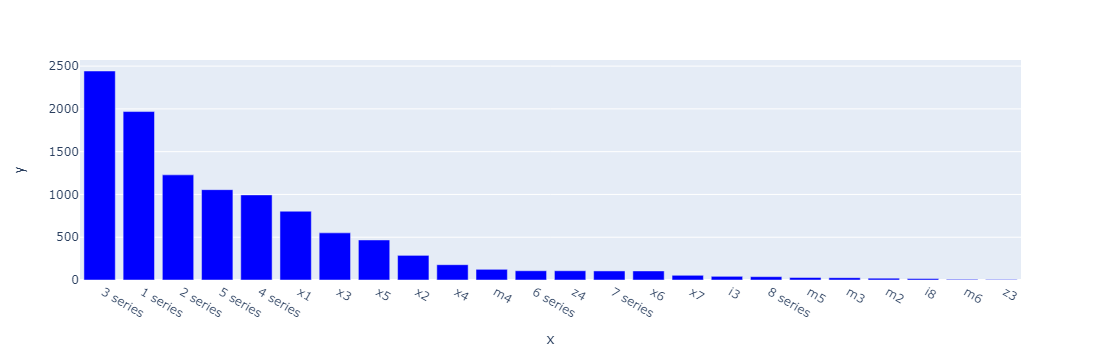

In [24]:
bmw_counts = df_bmw['model'].value_counts()
fig = px.bar(x=bmw_counts.index, y=bmw_counts.values,
            color_discrete_sequence=["blue"]
            )
fig.show()

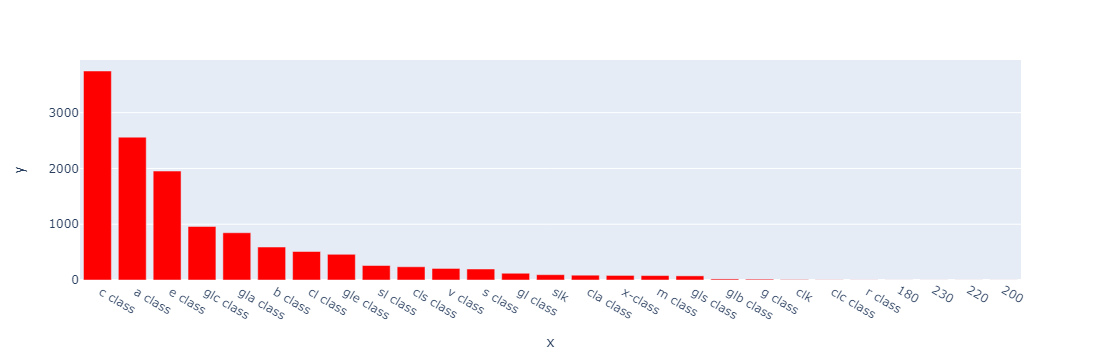

In [24]:
merc_counts = df_merc['model'].value_counts()
fig = px.bar(x=merc_counts.index, y=merc_counts.values,
            color_discrete_sequence=["red"]
            )
fig.show()

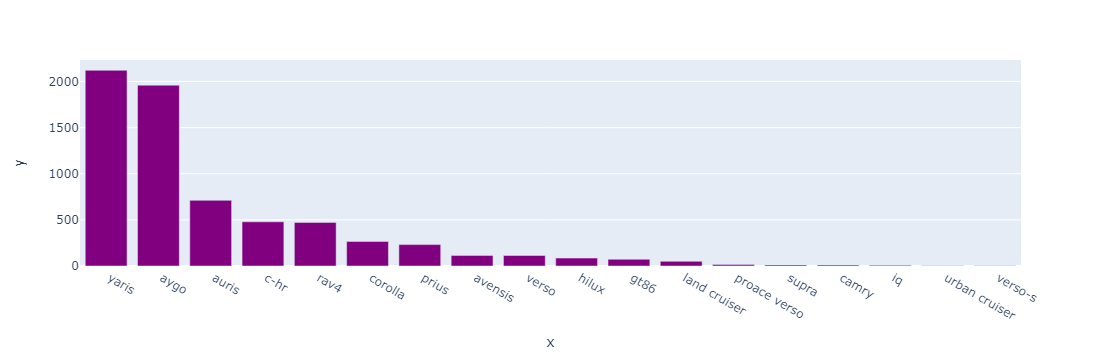

In [25]:
toyota_counts = df_toyota['model'].value_counts()
fig = px.bar(x=toyota_counts.index, y=toyota_counts.values,
            color_discrete_sequence=["purple"])
fig.show()

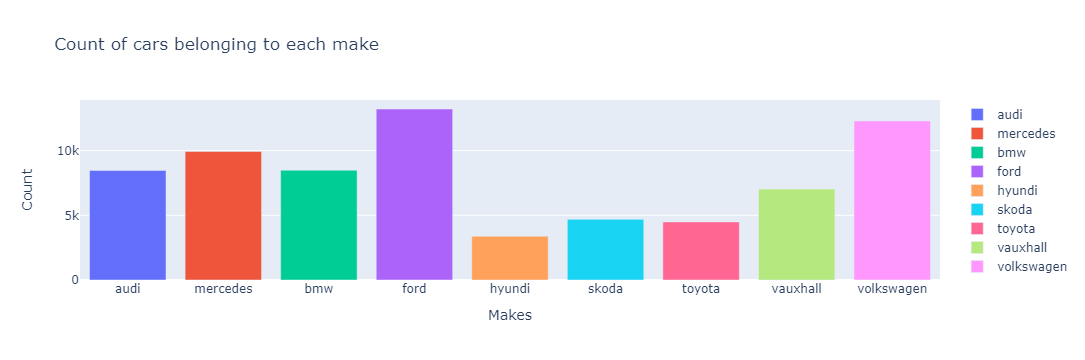

In [26]:

trace0 = go.Bar(
    x = merged_df[merged_df["make"]== 'audi']["make"].value_counts().index.values,
    y = merged_df[merged_df["make"]== 'audi']["make"].value_counts().values,
    name='audi'
)

trace1 = go.Bar(
    x = merged_df[merged_df["make"]== 'mercedes']["make"].value_counts().index.values,
    y = merged_df[merged_df["make"]== 'mercedes']["make"].value_counts().values,
    name='mercedes'
)

trace2 = go.Bar(
    x = merged_df[merged_df["make"]== 'bmw']["make"].value_counts().index.values,
    y = merged_df[merged_df["make"]== 'bmw']["make"].value_counts().values,
    name='bmw'
)

trace3 = go.Bar(
    x = merged_df[merged_df["make"]== 'ford']["make"].value_counts().index.values,
    y = merged_df[merged_df["make"]== 'ford']["make"].value_counts().values,
    name='ford'
)

trace4 = go.Bar(
    x = merged_df[merged_df["make"]== 'hyundi']["make"].value_counts().index.values,
    y = merged_df[merged_df["make"]== 'hyundi']["make"].value_counts().values,
    name='hyundi'
)

trace5 = go.Bar(
    x = merged_df[merged_df["make"]== 'skoda']["make"].value_counts().index.values,
    y = merged_df[merged_df["make"]== 'skoda']["make"].value_counts().values,
    name='skoda'
)

trace6 = go.Bar(
    x = merged_df[merged_df["make"]== 'toyota']["make"].value_counts().index.values,
    y = merged_df[merged_df["make"]== 'toyota']["make"].value_counts().values,
    name='toyota'
)

trace7 = go.Bar(
    x = merged_df[merged_df["make"]== 'vauxhall']["make"].value_counts().index.values,
    y = merged_df[merged_df["make"]== 'vauxhall']["make"].value_counts().values,
    name='vauxhall'
)

trace8 = go.Bar(
    x = merged_df[merged_df["make"]== 'volkswagen']["make"].value_counts().index.values,
    y = merged_df[merged_df["make"]== 'volkswagen']["make"].value_counts().values,
    name='volkswagen'
)

plot_data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6, trace7,trace8]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Makes'
    ),
    title='Count of cars belonging to each make'
)

fig = go.Figure(data=plot_data, layout=layout)

py.iplot(fig, filename='grouped-bar')


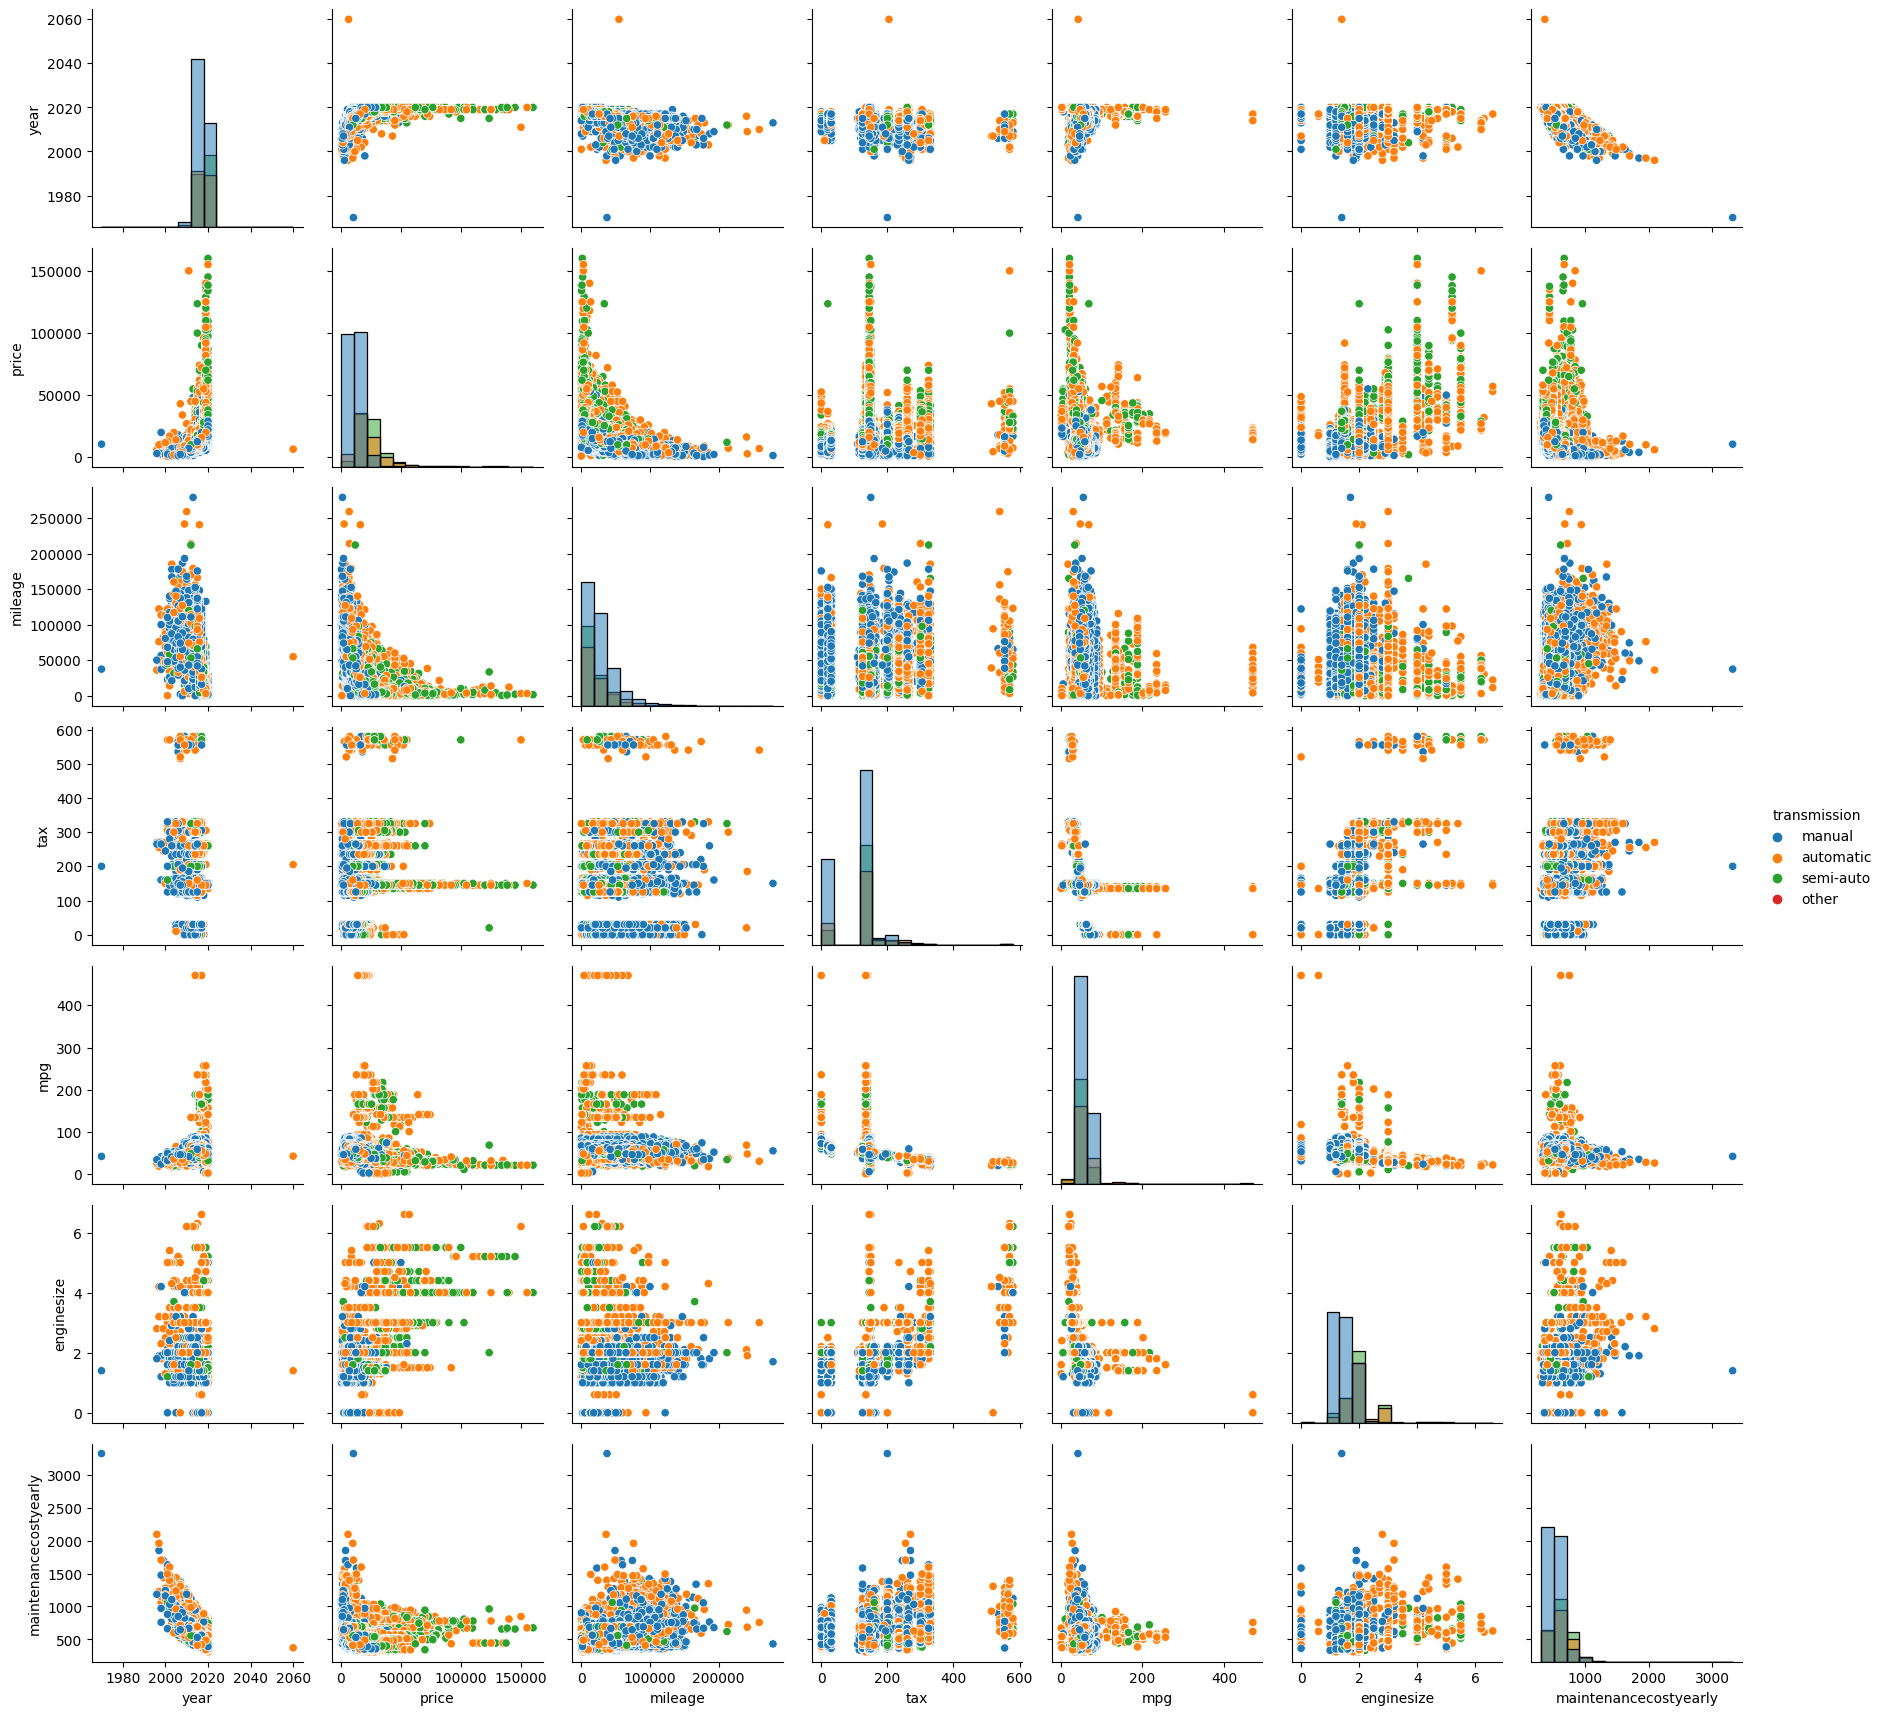

In [27]:
g = sns.PairGrid(merged_df, hue="transmission")
g.map_diag(sns.histplot,bins = 15)
g.map_offdiag(sns.scatterplot)
g.add_legend()

When analyzing the distribution of numerical features in a dataset, understanding the shape of each distribution can provide insights into the data 
and its characteristics. Here' s what each observation about the distributions of the features you mentioned generally means:
Year and MPG (Miles Per Gallon):

These features almost follow normal distributions.
A normal distribution, also known as a Gaussian distribution, is symmetric around the mean, with the majority of the data concentrated near the mean 
and tails extending equally in both directions. It suggests that the data is well-distributed and balanced.
Price and Mileage:
These features have skewness.
Skewness refers to the asymmetry or lack of symmetry in the distribution of data.
Positive skewness means the tail on the right side of the distribution is longer or fatter than the left side, indicating that the distribution 
has a rightward skew. This often occurs with features like price and mileage, where a few high values (e.g., expensive cars or cars with high mileage) 
cause the distribution to be stretched towards the right.
Negative skewness means the tail on the left side of the distribution is longer or fatter than the right side, indicating a leftward skew.
Tax and Engine Size:
These features don't follow any specific distribution.
It means that the distribution of these features doesn't conform to a well-known statistical distribution, such as normal, uniform
or exponential distributions.
The distribution might be irregular, multimodal (having multiple peaks), or exhibit other complex patterns.
Understanding the distribution of features in your dataset is important for various tasks such as data preprocessing, feature engineering,
    and modeling. Skewed distributions, for example, might require transformation (e.g., logarithmic transformation) to make them more symmetric,
which can improve the performance of certain machine learning algorithms. Similarly, identifying irregular distributions can prompt further 
investigation or preprocessing steps to handle them appropriately.

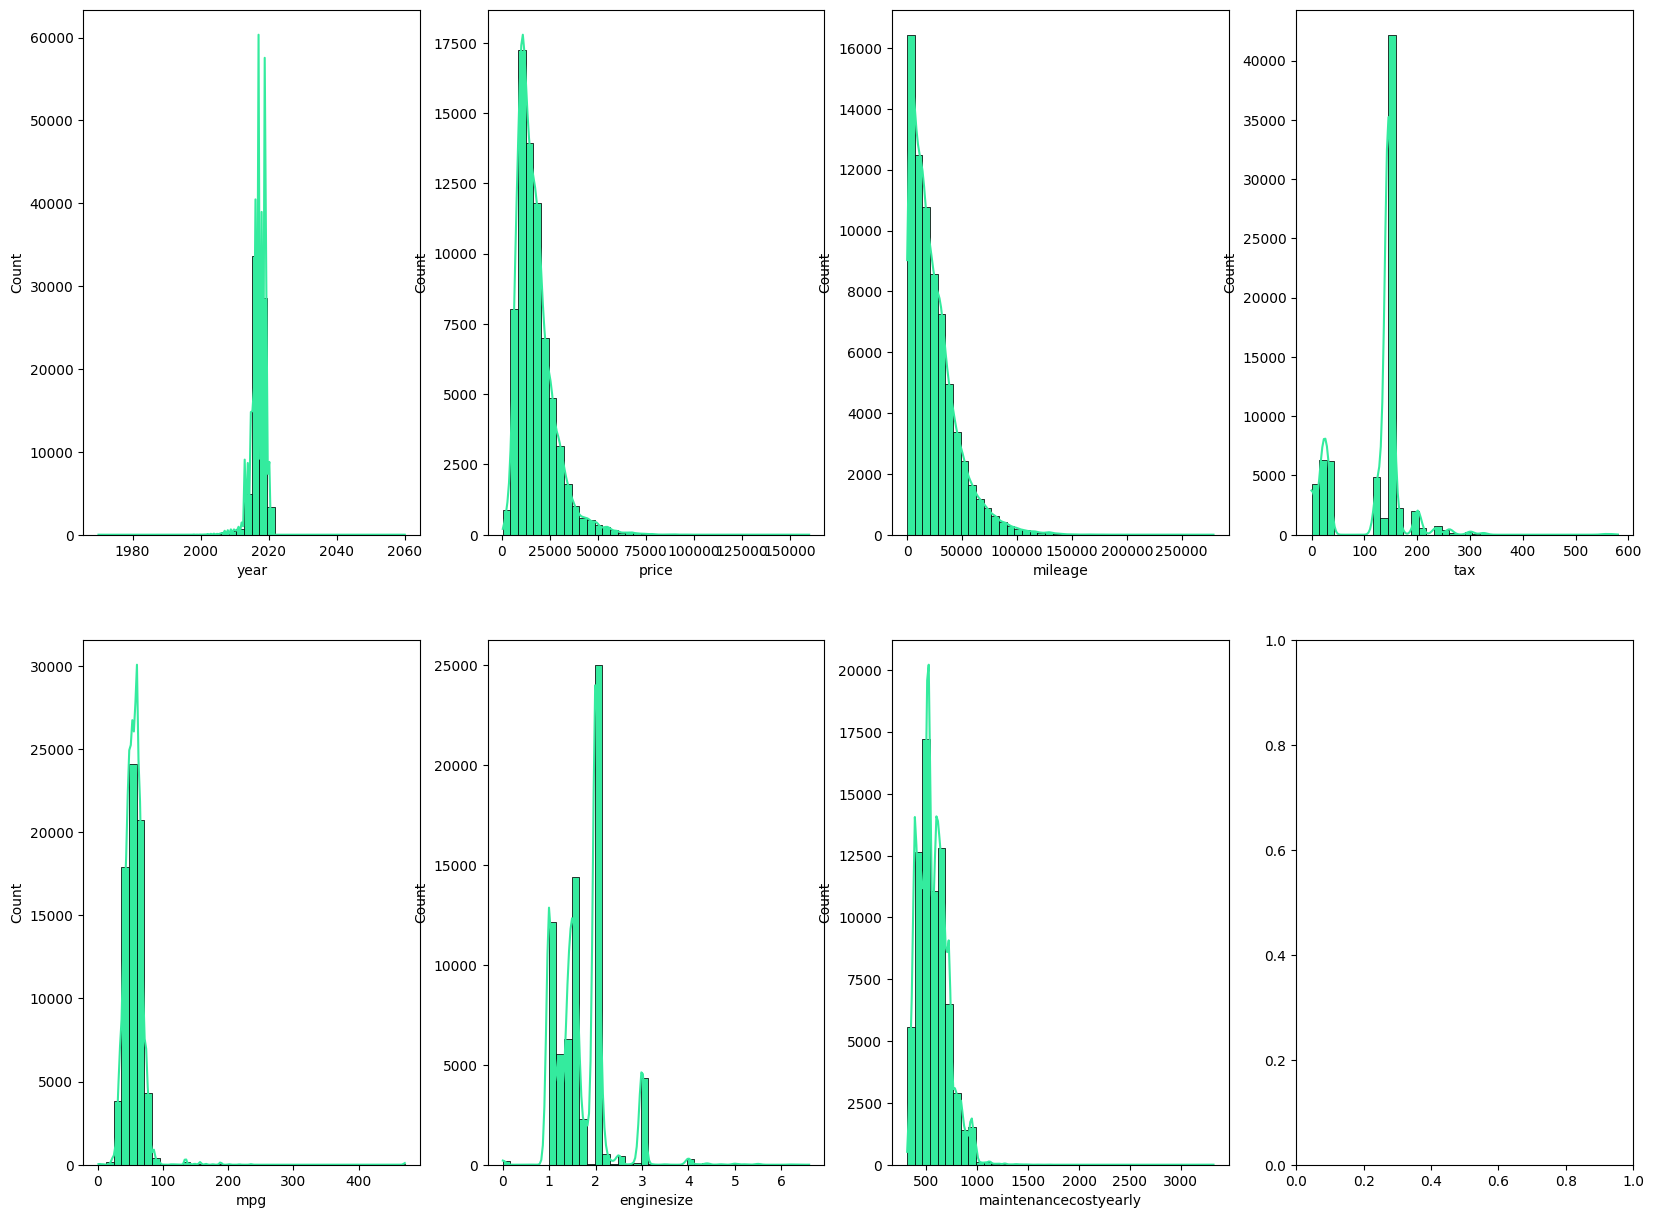

In [28]:
fig, axes = plt.subplots(2,4,figsize=(20, 15))
ax = axes.flatten()
i=0

for col in ['year','price','mileage','tax','mpg','enginesize','maintenancecostyearly']:
   
        sns.histplot(merged_df[col], kde=True,ax=ax[i], alpha = 1.0 , color="#34eb9e",bins = 40)
        i = i+1
plt.show()

distributions of multiple numerical features in your dataset, providing insights into the data's characteristics, such as skewness, central tendency, and dispersion.

In [25]:
def outlier_treatment(datacolumn,coef):
   sorted(datacolumn)
   Q1,Q3 = np.percentile(datacolumn , [25,75])
   IQR = Q3-Q1
   lower_range = Q1 - (coef * IQR)
   upper_range = Q3 + (coef * IQR)
   return lower_range,upper_range

You can use this function to calculate the lower and upper bounds for outliers in a dataset, given a specific coefficient (coef). Then, you can decide how to handle the outliers based on these bounds. For example, you might choose to remove the data points outside these bounds or apply another outlier treatment method.

In [26]:
print("Previous Shape: ", merged_df.shape)
for col in ['mileage','tax','mpg','enginesize','maintenancecostyearly']:
    if col == 'tax':
        coef = 6.5
    else:
        coef = 1.7
    lowerbound,upperbound = outlier_treatment(merged_df[col],coef)
    merged_df.drop(merged_df[ (merged_df[col] > upperbound) | (merged_df[col] < lowerbound) ].index , inplace=True)
print("New Shape: ", merged_df.shape)

Previous Shape:  (71966, 11)
New Shape:  (50406, 11)


This code effectively identifies and removes outliers from the specified columns in your dataset based on the calculated bounds.

Randomization: Shuffling ensures that the order of data points is random, reducing bias from any pre-existing order, like time or ID.

Avoiding Overfitting: When splitting data for training and testing, shuffling ensures both sets are representative, preventing the model from memorizing specific patterns.

Improving Generalization: Randomness introduced by shuffling helps the model learn more robust patterns, improving its ability to perform well on new data.

Enhancing Model Training: Shuffling ensures each training batch contains diverse samples, aiding the model in converging faster and avoiding local minima.
so below this line of code making data shuffling....

In [27]:
merged_df = merged_df.sample(frac = 1)  

In [28]:
merged_df

,make,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize,maintenancecostyearly
3475,toyota,aygo,2015,6495,manual,17872,petrol,0,69.0,1.0,660.32
2483,ford,fiesta,2015,10500,manual,23640,petrol,145,47.9,1.6,442.32
5571,vauxhall,adam,2018,10395,manual,44,petrol,150,53.3,1.2,371.22
71,bmw,5 series,2016,14900,automatic,35309,diesel,125,60.1,2.0,753.62
9216,ford,s-max,2017,17495,semi-auto,30000,diesel,145,52.3,2.0,594.87
...,...,...,...,...,...,...,...,...,...,...,...
966,ford,focus,2018,18699,manual,11736,petrol,145,41.5,2.0,506.91
1866,hyundi,kona,2018,17495,manual,30,petrol,145,44.1,1.0,382.33
3279,ford,fiesta,2018,11991,manual,25515,petrol,145,62.8,1.0,522.56
9757,mercedes,c class,2011,9495,automatic,39000,petrol,160,43.5,1.8,919.38


In [60]:
import pandas as pd



# Feature Engineering
# Define fuel cost per mile based on fuel type and miles per gallon (mpg)
petrol_price_per_litre = 1.4251  # £/litre
diesel_price_per_litre = 1.5090  # £/litre

# Define function to calculate fuel cost per mile
def calculate_fuel_cost_per_mile(row):
    if row['fueltype'] == 'petrol':  # Assuming 'fuelType' is the correct column name
        fuel_price = petrol_price_per_litre
    else:
        fuel_price = diesel_price_per_litre
    fuel_cost_per_mile = (1 / row['mpg']) * (5.546 / 1) * fuel_price  # £ per mile
    return fuel_cost_per_mile

# Apply the function to each row and create a new column for fuel cost per mile
merged_df['fuel_cost_per_mile'] = merged_df.apply(calculate_fuel_cost_per_mile, axis=1)

# Total Cost of Ownership Calculation
# Calculate purchase cost, fuel cost, and maintenance cost
merged_df['purchase_cost'] = merged_df['price']
merged_df['fuel_cost'] = merged_df['fuel_cost_per_mile'] * 8000 * 5  # 8,000 miles per year for 5 years
merged_df['maintenance_cost'] = merged_df['maintenancecostyearly'] * 5
merged_df['tax_cost']=merged_df['tax']*5



# Calculate total cost of ownership
merged_df['total_cost_of_ownership'] = merged_df['purchase_cost'] + merged_df['fuel_cost'] + merged_df['maintenance_cost']+merged_df['tax_cost']
merged_df



,make,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize,maintenancecostyearly,fuel_cost_per_mile,purchase_cost,fuel_cost,maintenance_cost,total_cost_of_ownership,tax_cost
0,skoda,kamiq,2020,22500,semi-auto,2500,diesel,145,52.3,1.6,477.34,0.160017,22500,6400.699044,2386.70,32012.399044,725
1,skoda,octavia,2017,11750,manual,10326,diesel,145,68.9,1.6,469.22,0.121465,11750,4858.585776,2346.10,19679.685776,725
2,vauxhall,astra,2019,11699,manual,20350,petrol,145,51.4,1.4,389.31,0.153767,11699,6150.665058,1946.55,20521.215058,725
3,mercedes,c class,2019,31299,semi-auto,4831,diesel,145,61.4,2.0,721.93,0.136302,31299,5452.061238,3609.65,41085.711238,725
4,bmw,3 series,2019,31450,semi-auto,4568,petrol,145,41.5,2.0,662.21,0.190448,31450,7617.932145,3311.05,43103.982145,725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50401,ford,focus,2019,16495,manual,7137,petrol,150,60.1,1.0,393.52,0.131508,16495,5260.302562,1967.60,24472.902562,750
50402,hyundi,i30,2017,13495,manual,300,petrol,145,52.3,1.4,503.71,0.151121,13495,6044.821874,2518.55,22783.371874,725
50403,ford,edge,2017,21999,manual,22000,diesel,150,47.9,2.0,415.60,0.174716,21999,6988.654697,2078.00,31815.654697,750
50404,hyundi,kona,2018,12495,manual,23387,petrol,145,52.3,1.0,382.33,0.151121,12495,6044.821874,1911.65,21176.471874,725


In [61]:
merged_df['total_cost_of_ownership']

0        32012.399044
1        19679.685776
2        20521.215058
3        41085.711238
4        43103.982145
             ...     
50401    24472.902562
50402    22783.371874
50403    31815.654697
50404    21176.471874
50405    26614.376636
Name: total_cost_of_ownership, Length: 50406, dtype: float64

Feature Engineering:

Calculate the fuel cost per mile for each car model based on the provided fuel prices (£1.4251 for petrol and £1.5090 for diesel), fuel type, and miles per gallon (mpg).
Total Cost of Ownership Calculation:

For each car model, calculate the total cost of ownership over five years:
Purchase cost = price
Fuel cost = fuel cost per mile * 8,000 miles * 5 years
Maintenance cost = maintenancecostyearly * 5 years
Total cost of ownership = purchase cost + fuel cost + maintenance cost

Split the data into training and testing sets: Divide the encoded data into training and testing sets to evaluate the model's performance.
Choose a machine learning algorithm: Select an appropriate machine learning algorithm for your task, such as Random Forest Regression, Gradient Boosting, or Linear Regression.
Train the model: Train the selected machine learning model using the encoded data in the training set.
Evaluate the model: Evaluate the trained model's performance on the testing set using appropriate evaluation metrics, such as mean squared error (MSE) or R-squared (R²).
Feature importance: Investigate the importance of different features (including the one-hot encoded columns) in predicting the target variable (e.g., total cost of ownership or maintenance cost).
Calculate total cost of ownership: Use the trained model to predict the target variable (e.g., maintenance cost) for each car model. Then, calculate the total cost of ownership by combining the predicted maintenance cost with other relevant factors, such as the purchase price, fuel costs (based on mileage, mpg, and fuel type), and any other expenses over the desired ownership period (e.g., 5 years).
Ranking and recommendation: Sort the car models in ascending order based on their total cost of ownership and recommend the models with the lowest total cost as the most cost-effective options.
Deployment and monitoring: If you plan to use the model in a production environment, consider deploying it as a web service or integrating it with a user interface. Monitor the model's performance over time and retrain or update it as new data becomes available or if there are any significant changes in the underlying data distribution.

In [31]:
categorical_cols = ['make','model', 'transmission','fueltype']
merged_df[categorical_cols] = merged_df[categorical_cols].apply(lambda x: x.astype('category'))
print(merged_df.info())
merged_df

<class 'pandas.core.frame.DataFrame'>
Index: 50406 entries, 3475 to 115
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   make                     50406 non-null  category
 1   model                    50406 non-null  category
 2   year                     50406 non-null  int64   
 3   price                    50406 non-null  int64   
 4   transmission             50406 non-null  category
 5   mileage                  50406 non-null  int64   
 6   fueltype                 50406 non-null  category
 7   tax                      50406 non-null  int64   
 8   mpg                      50406 non-null  float64 
 9   enginesize               50406 non-null  float64 
 10  maintenancecostyearly    50406 non-null  float64 
 11  fuel_cost_per_mile       50406 non-null  float64 
 12  purchase_cost            50406 non-null  int64   
 13  fuel_cost                50406 non-null  float64 
 14  maintenanc

,make,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize,maintenancecostyearly,fuel_cost_per_mile,purchase_cost,fuel_cost,maintenance_cost,total_cost_of_ownership
3475,toyota,aygo,2015,6495,manual,17872,petrol,0,69.0,1.0,660.32,0.114545,6495,4581.799768,3301.60,14378.399768
2483,ford,fiesta,2015,10500,manual,23640,petrol,145,47.9,1.6,442.32,0.165002,10500,6600.087349,2211.60,19311.687349
5571,vauxhall,adam,2018,10395,manual,44,petrol,150,53.3,1.2,371.22,0.148285,10395,5931.410582,1856.10,18182.510582
71,bmw,5 series,2016,14900,automatic,35309,diesel,125,60.1,2.0,753.62,0.139250,14900,5569.992679,3768.10,24238.092679
9216,ford,s-max,2017,17495,semi-auto,30000,diesel,145,52.3,2.0,594.87,0.160017,17495,6400.699044,2974.35,26870.049044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,ford,focus,2018,18699,manual,11736,petrol,145,41.5,2.0,506.91,0.190448,18699,7617.932145,2534.55,28851.482145
1866,hyundi,kona,2018,17495,manual,30,petrol,145,44.1,1.0,382.33,0.179220,17495,7168.802358,1911.65,26575.452358
3279,ford,fiesta,2018,11991,manual,25515,petrol,145,62.8,1.0,522.56,0.125854,11991,5034.143057,2612.80,19637.943057
9757,mercedes,c class,2011,9495,automatic,39000,petrol,160,43.5,1.8,919.38,0.181692,9495,7267.682391,4596.90,21359.582391


OneHotEncoding:we cannot say that some data in dataset are not usefull they always usefull we should make it usefull even the string is also a data just convert it into newmerical so that machine learning model can handel it effectively

In [33]:
ce_OHE = ce.OneHotEncoder(cols=['make','model','fueltype','transmission'])

data1 = ce_OHE.fit_transform(merged_df)
data1.head()


,make_1,make_2,make_3,make_4,make_5,make_6,make_7,make_8,make_9,model_1,...,fueltype_5,tax,mpg,enginesize,maintenancecostyearly,fuel_cost_per_mile,purchase_cost,fuel_cost,maintenance_cost,total_cost_of_ownership
3475,1,0,0,0,0,0,0,0,0,1,...,0,0,69.0,1.0,660.32,0.114545,6495,4581.799768,3301.60,14378.399768
2483,0,1,0,0,0,0,0,0,0,0,...,0,145,47.9,1.6,442.32,0.165002,10500,6600.087349,2211.60,19311.687349
5571,0,0,1,0,0,0,0,0,0,0,...,0,150,53.3,1.2,371.22,0.148285,10395,5931.410582,1856.10,18182.510582
71,0,0,0,1,0,0,0,0,0,0,...,0,125,60.1,2.0,753.62,0.139250,14900,5569.992679,3768.10,24238.092679
9216,0,1,0,0,0,0,0,0,0,0,...,0,145,52.3,2.0,594.87,0.160017,17495,6400.699044,2974.35,26870.049044


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RANSACRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Load the dataset
data = pd.read_csv('mydata1.csv')

# Assuming 'total_cost_of_ownership' is your target variable
X = data.drop('total_cost_of_ownership', axis=1)
y = data['total_cost_of_ownership']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize regressor models
regressors = [
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    RANSACRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor()
]

# Train each model and evaluate performance
for regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{regressor.__class__.__name__} Mean Squared Error: {mse}")



ExtraTreesRegressor Mean Squared Error: 1968035.7779099823
RandomForestRegressor Mean Squared Error: 6607790.997963778
DecisionTreeRegressor Mean Squared Error: 8511055.419945529
LinearRegression Mean Squared Error: 6.832448636367222e-08
Lasso Mean Squared Error: 6.736267634288818e-06
Ridge Mean Squared Error: 1.5458220635720014e-15
ElasticNet Mean Squared Error: 8.817346082359575e-06
RANSACRegressor Mean Squared Error: 7.034286619141117e-06
KNeighborsRegressor Mean Squared Error: 278783.86908265576
GradientBoostingRegressor Mean Squared Error: 1154382.435471408


Linear Regression Mean Squared Error: 6.832448636367222e-08
Ridge Mean Squared Error: 1.5458220635720014e-15
A lower MSE indicates that these models are performing better in terms of predicting the target variable compared to the other models listed.

In [38]:
from fast_ml.model_development import train_valid_test_split
x_train, y_train,x_valid, y_valid,x_test, y_test = train_valid_test_split(data,
                                                                         target = 'total_cost_of_ownership', 
                                                                         train_size=0.6,
                                                                         valid_size=0.2,
                                                                         test_size=0.2,
                                                                         random_state=0)
print(y_train.shape)
print(y_valid.shape)
print(x_test.shape)

(43179,)
(14393,)
(14394, 218)


In [40]:
head = 7
for model in regressors[:head]:
    model.fit(x_train, y_train)
    y_pred_valid = model.predict(x_valid)  
    y_pred_train = model.predict(x_train)
    print(model)
    print("\tExplained variance train:", explained_variance_score(y_train, y_pred_train))
    print("\tExplained variance valid:", explained_variance_score(y_valid, y_pred_valid))
    print("\tMean absolute error:", mean_absolute_error(y_valid, y_pred_valid))
    print('\tMean Squared Error:', mean_squared_error(y_valid, y_pred_valid))
    print("\tR2 score:", r2_score(y_valid, y_pred_valid))
    print()

ExtraTreesRegressor()
	Explained variance train: 0.9999999999999972
	Explained variance valid: 0.9988566034804668
	Mean absolute error: 65.64495009709644
	Mean Squared Error: 153747.21790290906
	R2 score: 0.9988560876535423

RandomForestRegressor()
	Explained variance train: 0.9989128800793357
	Explained variance valid: 0.998561746470298
	Mean absolute error: 89.33380553095529
	Mean Squared Error: 193370.98438760111
	R2 score: 0.9985612783144645

DecisionTreeRegressor()
	Explained variance train: 1.0
	Explained variance valid: 0.9982633381615854
	Mean absolute error: 146.56096985935835
	Mean Squared Error: 233446.73631531332
	R2 score: 0.9982631061065445

LinearRegression()
	Explained variance train: 1.0
	Explained variance valid: 1.0
	Mean absolute error: 2.910110271827123e-07
	Mean Squared Error: 3.024649715378802e-10
	R2 score: 1.0

Lasso()
	Explained variance train: 0.9999999999999616
	Explained variance valid: 0.9999999999999618
	Mean absolute error: 0.001741726936713885
	Mean Squ

Now here after seeing all model performing very good i choose linerRegression for further analysis

In [ ]:
import pickle
from sklearn.linear_model import LinearRegression

linear_regression_model = regressors[3]
RandomForestRegressor = regressors[4]

# Save the trained LinearRegression model to a file
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(linear_regression_model, model_file)

# Save the trained RandomForestRegressor model to a file
with open('RandomForestRegressor.pkl', 'wb') as model_file:
    pickle.dump(RandomForestRegressor, model_file)


The explained variance is very close to 1.0 for all models, indicating that they are capturing the variance in the target variable very well.
The mean absolute error and mean squared error are low across all models, suggesting that the models are making accurate predictions with small errors.
The R2 score is very close to 1.0 for all models, indicating that the models explain a high percentage of the variance in the target variable.

Xgboost is Magician!!!!
Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm. Shortly after its development and initial release, XGBoost became the go-to method and often the key component in winning solutions for a range of problems in machine learning competitions. I've reached 92% variance score for both train and validation set and there is no overfitting.

In [ ]:
pip install xgboost

In [42]:
import xgboost 
xgb_reg = xgboost.XGBRegressor(max_depth=7, n_estimators=200, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.02,feature_fraction=0.7, 
                                  scale_pos_weight=1.8)

# Train the model with train data sets
xgb_reg.fit(x_train, y_train)
y_pred_valid = xgb_reg.predict(x_valid)  
y_pred_train = xgb_reg.predict(x_train)

print("\tExplained variance train:", explained_variance_score(y_train, y_pred_train))
print("\tExplained variance valid:", explained_variance_score(y_valid, y_pred_valid))
print("\tMean absolute error:", mean_absolute_error(y_valid, y_pred_valid))
print('\tMean Squared Error:', mean_squared_error(y_valid, y_pred_valid))
print("\tR2 score:", r2_score(y_valid, y_pred_valid))

	Explained variance train: 0.9983248197064672
	Explained variance valid: 0.9931491729606876
	Mean absolute error: 242.76953192834233
	Mean Squared Error: 920959.6454427482
	R2 score: 0.9931478622938299


>1, train: 0.310, test: 0.316
>2, train: 0.653, test: 0.668
>3, train: 0.849, test: 0.851
>4, train: 0.927, test: 0.930
>5, train: 0.962, test: 0.963
>6, train: 0.978, test: 0.979
>7, train: 0.987, test: 0.987
>8, train: 0.991, test: 0.990
>9, train: 0.994, test: 0.992
>10, train: 0.995, test: 0.992


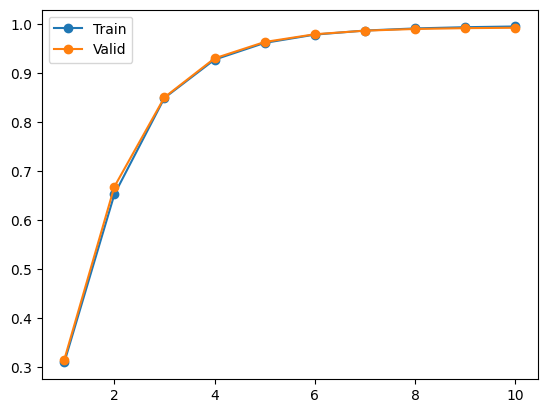

In [43]:
train_scores, valid_scores = list(), list()
values = [i for i in range(1, 11)]

for i in values:

    model = xgboost.XGBRegressor(max_depth=i, n_estimators=i*20, n_jobs=2,
                            booster='gbtree', min_child_weight=6,gamma=0.5,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.01
                           ,random_state=42, learning_rate=0.02, 
                                  scale_pos_weight=0.2*i,eval_metric='mlogloss')

    model.fit(x_train, y_train)

    train_yhat = model.predict(x_train)
    train_r2_score = r2_score(y_train, train_yhat)
    train_scores.append(train_r2_score)

    valid_yhat = model.predict(x_valid)
    valid_r2_score = r2_score(y_valid, valid_yhat)
    valid_scores.append(valid_r2_score)
 
    print('>%d, train: %.3f, test: %.3f' % (i, train_r2_score, valid_r2_score))

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, valid_scores, '-o', label='Valid')
plt.legend()
plt.show()

In [152]:
import pandas as pd
from datetime import datetime

# Load the data from the CSV file
merged_df = pd.read_csv('output_dataset.csv')
merged_df.drop(['fuel_cost_per_mile'], axis=1, inplace=True)
merged_df.drop(['purchase_cost'], axis=1, inplace=True)
merged_df.drop(['fuel_cost'], axis=1, inplace=True)
merged_df.drop(['maintenance_cost'], axis=1, inplace=True)
merged_df.drop(['total_cost_of_ownership'], axis=1, inplace=True)

merged_df


,make,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize,maintenancecostyearly
0,skoda,kamiq,2020,22500,semi-auto,2500,diesel,145,52.3,1.6,477.34
1,skoda,octavia,2017,11750,manual,10326,diesel,145,68.9,1.6,469.22
2,vauxhall,astra,2019,11699,manual,20350,petrol,145,51.4,1.4,389.31
3,mercedes,c class,2019,31299,semi-auto,4831,diesel,145,61.4,2.0,721.93
4,bmw,3 series,2019,31450,semi-auto,4568,petrol,145,41.5,2.0,662.21
...,...,...,...,...,...,...,...,...,...,...,...
50401,ford,focus,2019,16495,manual,7137,petrol,150,60.1,1.0,393.52
50402,hyundi,i30,2017,13495,manual,300,petrol,145,52.3,1.4,503.71
50403,ford,edge,2017,21999,manual,22000,diesel,150,47.9,2.0,415.60
50404,hyundi,kona,2018,12495,manual,23387,petrol,145,52.3,1.0,382.33


In [210]:
import pandas as pd
from datetime import datetime

def calculate_fuel_cost_per_mile(row, miles):
    petrol_price_per_litre = 1.4251  # £/litre
    diesel_price_per_litre = 1.5090  # £/litre
    gallons_to_litres_conversion_factor = 5.549  # 1 Gallons = 5.549 litres
    
    if row['fueltype'] == 'petrol':
        fuel_price_per_litre = petrol_price_per_litre
    else:
        fuel_price_per_litre = diesel_price_per_litre
    
    litres_per_mile = row['mpg'] / gallons_to_litres_conversion_factor
    fuel_cost_per_mile = litres_per_mile * fuel_price_per_litre  # £ per mile
    
    return fuel_cost_per_mile * miles

# Load your dataset
merged_df = pd.read_csv("output_dataset.csv")

# User Input
make = input("Enter the car make: ")
car_year = int(input("Enter the year of the car: "))
miles = int(input("Enter the expected annual mileage: "))

# Prompt for fuel type (petrol/diesel)
fueltype = input("Enter the fuel type (petrol/diesel): ")

years = int(input("Enter the number of years of ownership: "))
current_year = datetime.now().year
car_age = current_year - car_year

# Load purchase cost and maintenance cost from dataset
car_data_user_choice_car = merged_df[(merged_df['make'] ==make) & (merged_df['year'] == car_age) & (merged_df['fueltype'] == fueltype)].copy()
car_data_given_choice_year=  merged_df[(merged_df['make']!=make) & (merged_df['year'] == car_age) & (merged_df['fueltype'] == fueltype)].copy()

if not car_data_user_choice_car.empty:
    # Compute fuel cost per mile for each car
    car_data_user_choice_car['fuel_cost'] = car_data_user_choice_car.apply(calculate_fuel_cost_per_mile, miles=miles, axis=1)
    car_data_user_choice_car['maintenance_cost'] = car_data_user_choice_car['maintenancecostyearly'] * years
    car_data_user_choice_car['tax_cost'] = car_data_user_choice_car['tax'] * years
    car_data_user_choice_car['total_cost_of_ownership'] = car_data_user_choice_car['price'] + car_data_user_choice_car['fuel_cost'] + car_data_user_choice_car['maintenance_cost'] + car_data_user_choice_car['tax_cost']
    car_data_given_choice_year['fuel_cost'] = car_data_given_choice_year.apply(calculate_fuel_cost_per_mile, miles=miles, axis=1)
    car_data_given_choice_year['maintenance_cost'] =car_data_given_choice_year['maintenancecostyearly'] * years
    car_data_given_choice_year['tax_cost'] = car_data_given_choice_year['tax'] * years
    car_data_given_choice_year['total_cost_of_ownership'] = car_data_given_choice_year['price'] + car_data_given_choice_year['fuel_cost'] + car_data_given_choice_year['maintenance_cost'] + car_data_given_choice_year['tax_cost']
    
    total_ownnership_cost_for_user_choice_car = car_data_given_choice_year['total_cost_of_ownership'].mean()
    
    # Display the total cost of ownership for the specified car if any
    print("\nPredicted Total Cost of Ownership for the Specified Car:")
    print(f"Make: {make}")
    print(f"Expected Annual Mileage: {miles} miles")
    print(f"Years of Ownership: {years} years")
    print(f"total cost user will pay : { total_ownnership_cost_for_user_choice_car :.0f}")
else:
    print(f"No matching cars found for make '{make}' and fuel type '{fueltype}'.")

# Calculate the total ownership cost range based on the user's choice car
close_cost_other_cars_min = total_ownnership_cost_for_user_choice_car * 0.8
close_cost_other_cars_max = total_ownnership_cost_for_user_choice_car * 1  # Adjust range as needed

# Filter the cars from the other data frame that fall within the calculated range
close_cost_other_cars = car_data_given_choice_year[
    (car_data_given_choice_year['total_cost_of_ownership'] >= close_cost_other_cars_min) &
    (car_data_given_choice_year['total_cost_of_ownership'] <= close_cost_other_cars_max)
]

# Ensure at least one car from each brand is included
recommended_cars = pd.concat([car_data_given_choice_year, close_cost_other_cars])
recommended_cars = recommended_cars.groupby('make').head(1)  # Get one car per brand

# Print the recommended cars without decimal point values
print("Recommended Cost-Effective Cars within the Total Cost of Ownership Range (One Car per Brand):")
recommended_cars['total_cost_of_ownership'] = recommended_cars['total_cost_of_ownership'].astype(int)  # Convert to integer
print(recommended_cars[['make', 'model', 'total_cost_of_ownership']])

# Calculate the total cost of ownership for the specified car
specified_car_total_cost = car_data_user_choice_car['total_cost_of_ownership'].mean()

# Find cars from the user choice dataframe that have a total ownership cost close to the specified car's total ownership cost
close_cost_specified_car = car_data_user_choice_car[
    abs(car_data_user_choice_car['total_cost_of_ownership'] - specified_car_total_cost).lt(specified_car_total_cost * 0.1)
]

# Ensure only 5 closest cars are shown
close_cost_specified_car = close_cost_specified_car.nsmallest(5, 'total_cost_of_ownership')

# Display the cars close to the specified car's total ownership cost
print("Cars with Total Ownership Cost close to the Specified Car:")
close_cost_specified_car['total_cost_of_ownership']=close_cost_specified_car['total_cost_of_ownership'].astype(int)
print(close_cost_specified_car[['make', 'model', 'total_cost_of_ownership']])

# Sort the DataFrame by total cost of ownership and select the top 5 rows
lowest_cost_cars = car_data_user_choice_car.sort_values(by='total_cost_of_ownership').head(5)

# Print the details of the 5 cars with the lowest total cost of ownership
print("Details of the 5 Cars with the Lowest Total Cost of Ownership:")
lowest_cost_cars['total_cost_of_ownership']=lowest_cost_cars['total_cost_of_ownership'].astype(int)
print(lowest_cost_cars[['make', 'model', 'total_cost_of_ownership']])

# Check the unique brands in the recommended cars DataFrame
unique_brands_recommended_cars = recommended_cars['make'].unique()
print("If there empty column means there is no car in that year of  your requirement only these car are available:", unique_brands_recommended_cars)

car_data_user_choice_car.drop(['fuel_cost'], axis=1, inplace=True)
car_data_user_choice_car.drop(['maintenance_cost'], axis=1, inplace=True)
car_data_user_choice_car.drop(['tax_cost'], axis=1, inplace=True)
car_data_user_choice_car.drop(['total_cost_of_ownership'], axis=1, inplace=True)
car_data_given_choice_year.drop(['fuel_cost'], axis=1, inplace=True)
car_data_given_choice_year.drop(['maintenance_cost'], axis=1, inplace=True)
car_data_given_choice_year.drop(['tax_cost'], axis=1, inplace=True)
car_data_given_choice_year.drop(['total_cost_of_ownership'], axis=1, inplace=True)





Enter the car make:  skoda
Enter the year of the car:  13
Enter the expected annual mileage:  8000
Enter the fuel type (petrol/diesel):  diesel
Enter the number of years of ownership:  5



Predicted Total Cost of Ownership for the Specified Car:
Make: skoda
Expected Annual Mileage: 8000 miles
Years of Ownership: 5 years
total cost user will pay : 125201
Recommended Cost-Effective Cars within the Total Cost of Ownership Range (One Car per Brand):
             make     model  total_cost_of_ownership
3590     vauxhall    zafira                   130720
4311   volkswagen     jetta                   155559
12075    mercedes   a class                   123334
12464        ford      kuga                   114839
14012      hyundi      ix35                   115216
23044         bmw        x3                   126069
Cars with Total Ownership Cost close to the Specified Car:
        make     model  total_cost_of_ownership
49772  skoda   octavia                   144715
Details of the 5 Cars with the Lowest Total Cost of Ownership:
        make     model  total_cost_of_ownership
49772  skoda   octavia                   144715
If there empty column means there is no car in that y

In [211]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import pandas as pd
from datetime import datetime

def calculate_fuel_cost_per_mile(row, miles):
    petrol_price_per_litre = 1.4251  # £/litre
    diesel_price_per_litre = 1.5090  # £/litre
    gallons_to_litres_conversion_factor = 5.549  # 1 Gallons = 5.549 litres
    
    if row['fueltype'] == 'petrol':
        fuel_price_per_litre = petrol_price_per_litre
    else:
        fuel_price_per_litre = diesel_price_per_litre
    
    litres_per_mile = row['mpg'] / gallons_to_litres_conversion_factor
    fuel_cost_per_mile = litres_per_mile * fuel_price_per_litre  # £ per mile
    
    return fuel_cost_per_mile * miles

def calculate_cost():
    make = make_entry.get()
    car_year = int(year_entry.get())
    miles = int(miles_entry.get())
    fueltype = fueltype_entry.get()
    years = int(years_entry.get())
    current_year = datetime.now().year
    car_age = current_year - car_year
    
    # Load your dataset
    merged_df = pd.read_csv("output_dataset.csv")

    # Load purchase cost and maintenance cost from dataset
    car_data_user_choice_car = merged_df[(merged_df['make'] ==make) & (merged_df['year'] == car_age) & (merged_df['fueltype'] == fueltype)].copy()
    car_data_given_choice_year=  merged_df[(merged_df['make']!=make) & (merged_df['year'] == car_age) & (merged_df['fueltype'] == fueltype)].copy()

    if not car_data_user_choice_car.empty:
        # Compute fuel cost per mile for each car
        car_data_user_choice_car['fuel_cost'] = car_data_user_choice_car.apply(calculate_fuel_cost_per_mile, miles=miles, axis=1)
        car_data_user_choice_car['maintenance_cost'] = car_data_user_choice_car['maintenancecostyearly'] * years
        car_data_user_choice_car['tax_cost'] = car_data_user_choice_car['tax'] * years
        car_data_user_choice_car['total_cost_of_ownership'] = car_data_user_choice_car['price'] + car_data_user_choice_car['fuel_cost'] + car_data_user_choice_car['maintenance_cost'] + car_data_user_choice_car['tax_cost']
        car_data_given_choice_year['fuel_cost'] = car_data_given_choice_year.apply(calculate_fuel_cost_per_mile, miles=miles, axis=1)
        car_data_given_choice_year['maintenance_cost'] =car_data_given_choice_year['maintenancecostyearly'] * years
        car_data_given_choice_year['tax_cost'] = car_data_given_choice_year['tax'] * years
        car_data_given_choice_year['total_cost_of_ownership'] = car_data_given_choice_year['price'] + car_data_given_choice_year['fuel_cost'] + car_data_given_choice_year['maintenance_cost'] + car_data_given_choice_year['tax_cost']
        
        total_ownnership_cost_for_user_choice_car = car_data_given_choice_year['total_cost_of_ownership'].mean()
        
        # Populate Tkinter window with the output
        make_label = tk.Label(root, text=f"Make: {make}")
        make_label.grid(row=7, column=0, padx=5, pady=5)
        
        miles_label = tk.Label(root, text=f"Expected Annual Mileage: {miles} miles")
        miles_label.grid(row=8, column=0, padx=5, pady=5)
        
        years_label = tk.Label(root, text=f"Years of Ownership: {years} years")
        years_label.grid(row=9, column=0, padx=5, pady=5)
        
        total_cost_label = tk.Label(root, text=f"Total Cost of Ownership: {total_ownnership_cost_for_user_choice_car:.0f}")
        total_cost_label.grid(row=10, column=0, padx=5, pady=5)
    else:
        messagebox.showerror("Error", f"No matching cars found for make '{make}' and fuel type '{fueltype}'.")

# Create main window
root = tk.Tk()
root.title("Car Total Cost of Ownership Calculator")

# Create labels and entry fields
make_label = ttk.Label(root, text="Enter the car make:")
make_label.grid(row=0, column=0, padx=5, pady=5)
make_entry = ttk.Entry(root)
make_entry.grid(row=0, column=1, padx=5, pady=5)

year_label = ttk.Label(root, text="How much old car should be:")
year_label.grid(row=1, column=0, padx=5, pady=5)
year_entry = ttk.Entry(root)
year_entry.grid(row=1, column=1, padx=5, pady=5)

miles_label = ttk.Label(root, text="Enter the expected annual mileage:")
miles_label.grid(row=2, column=0, padx=5, pady=5)
miles_entry = ttk.Entry(root)
miles_entry.grid(row=2, column=1, padx=5, pady=5)

fueltype_label = ttk.Label(root, text="Enter the fuel type (petrol/diesel):")
fueltype_label.grid(row=3, column=0, padx=5, pady=5)
fueltype_entry = ttk.Entry(root)
fueltype_entry.grid(row=3, column=1, padx=5, pady=5)

years_label = ttk.Label(root, text="Enter the number of years of ownership:")
years_label.grid(row=4, column=0, padx=5, pady=5)
years_entry = ttk.Entry(root)
years_entry.grid(row=4, column=1, padx=5, pady=5)

calculate_button = ttk.Button(root, text="Calculate", command=calculate_cost)
calculate_button.grid(row=5, column=0, columnspan=2, padx=5, pady=5)

# Labels for displaying output
output_label = ttk.Label(root, text="Output:")
output_label.grid(row=6, column=0, padx=5, pady=5)

root.mainloop()
